In [1]:
%matplotlib inline

In [2]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import json
import concurrent
pandas.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
all_files = pandas.read_pickle('all_files-1479389211.5105846.pickle')

In [4]:
df = all_files[-all_files.key.str.contains('/')]

In [5]:
orig_df = df[df.key.str.startswith('orig-')]

In [6]:
converted_df = df[-df.key.str.startswith('orig-')]

In [7]:
orig_df = pandas.concat([orig_df.rename(columns={'key': 'orig_key'}), orig_df.key.str.replace('orig-', '')], axis=1)

In [8]:
image_list = pandas.merge(
    left=converted_df, 
    right=orig_df,
    on=['key'],
    how='outer',
    suffixes=('_converted', '_original')
)

In [ ]:
image_list

In [9]:
len(image_list)

718024

In [10]:
len(all_files)

1419180

In [37]:
len(image_list)

718024

In [27]:
jpeg_list = image_list[
    (image_list.content_type_converted=='image/jpeg')
    |
    (image_list.content_type_original=='image/jpeg')
]

In [54]:
jpeg_list['compression_ratio'] = jpeg_list.size_converted/jpeg_list.size_original

/home/javier/projects/ridee/veresizer/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
len(jpeg_list[jpeg_list.compression_ratio<1])

count    696579.000000
mean          0.649011
std           0.756140
min           0.021412
25%           0.506683
50%           0.548562
75%           0.580013
max          20.743121
Name: compression_ratio, dtype: float64

In [34]:
len(jpeg_list)

711692

In [36]:
len(image_list) - len(jpeg_list)

6332

In [28]:
len(jpeg_list[jpeg_list.size_converted > jpeg_list.size_original])

33802

In [29]:
len(jpeg_list[jpeg_list.size_converted <= jpeg_list.size_original])

662777

In [38]:
len(jpeg_list[jpeg_list.size_converted.isnull()])

11

In [31]:
len(jpeg_list[jpeg_list.size_original.isnull()])

15102

In [ ]:
jpeg_list[jpeg_list.size_original == jpeg_list.size_converted]

In [ ]:
jpeg_list[jpeg_list.size_converted.isnull()]

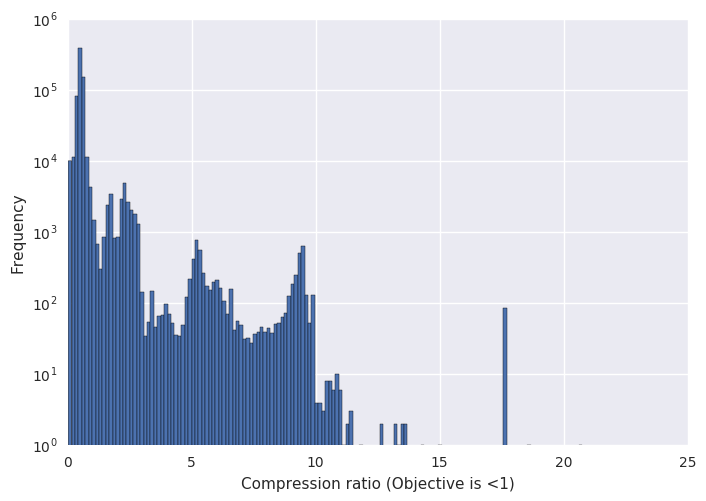

In [49]:
(jpeg_list[
    (-jpeg_list.size_converted.isnull())
    &
    (-jpeg_list.size_original.isnull())
].size_converted/jpeg_list[
    (-jpeg_list.size_converted.isnull())
    &
    (-jpeg_list.size_original.isnull())
].size_original).plot(kind='hist',bins=150,logy=True)
plt.xlabel('Compression ratio (Objective is <1)')

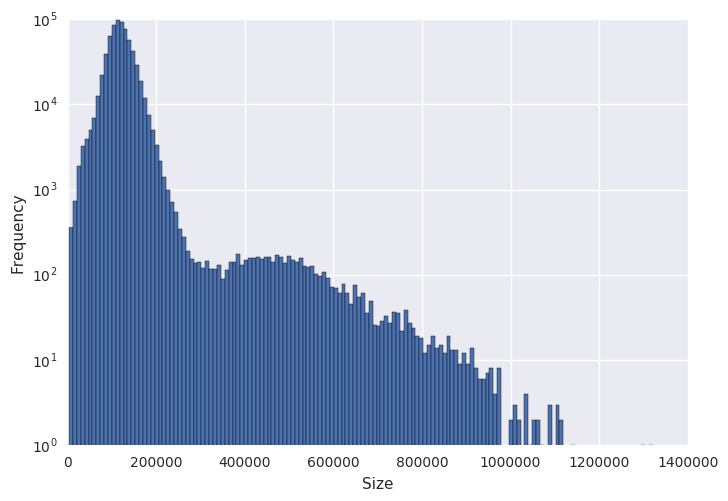

In [42]:
jpeg_list[
    (-jpeg_list.size_converted.isnull())
    &
    (-jpeg_list.size_original.isnull())
].size_converted.plot(
    kind='hist',
    bins=150,
    logy=True
)
plt.xlabel('Size')

In [122]:
jpeg_list[
    (-jpeg_list.size_converted.isnull())
    &
    (-jpeg_list.size_original.isnull())
].size_converted.describe(percentiles=[.8,.9,.95])

count    696579.000
mean     122737.095
std       48226.490
min        3168.000
50%      118087.000
80%      142276.400
90%      157759.000
95%      173862.000
max     1321532.000
Name: size_converted, dtype: float64

In [52]:
not_converted = jpeg_list[jpeg_list.size_original.isnull()]

In [53]:
len(not_converted)

15102

In [4]:
len(all_files[all_files.content_type != 'image/jpeg'])

10844

In [66]:
all_files.sum()

size    267138617771
dtype: int64

In [67]:
jpeg_list.sum()

size_converted       9.187960e+10
size_original        1.731972e+11
compression_ratio    4.520874e+05
dtype: float64

In [69]:
len(jpeg_list[jpeg_list.compression_ratio<1])/len(jpeg_list)

0.9312272724717996